In [1]:
import nibabel as nib
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

DIRECTORIES = [Path('data/training/HGG'), Path('data/training/LGG')]
OUTPUT = Path('data/processed/')

In [2]:
def rescale(im):
    # rescale image from float64 to uint8
    assert im.dtype == np.float64
    mi = np.nanmin(im)
    ma = np.nanmax(im)
    im = (im - mi) / (ma - mi) * (np.power(2.0, 8) - 1) + 0.499999999
    return im.astype(np.uint8)

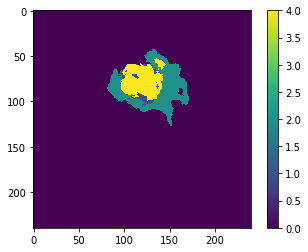

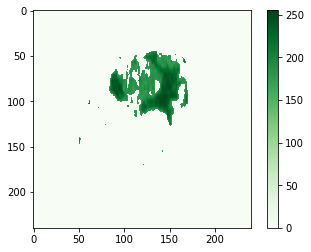

In [3]:
def show_layers(layer_id, subdir, layer_name, threshold):
    for filename in ['flair']:
        scan = nib.load(str(subdir / f'{subdir.name}_{filename}.nii.gz'))
        scan = scan.get_fdata()
        # rotate scans
        scan = np.swapaxes(scan, 0, 2)
        scan_layer = scan[layer_id]
        scan_layer = rescale(scan_layer)

        threshold_indices = scan_layer < threshold
        scan_layer[threshold_indices] = 0

        plt.imshow(scan_layer, cmap='Greens')
        plt.colorbar()
        plt.show()


def process(subdir):
    seg_file = subdir / f'{subdir.name}_seg.nii.gz'
    segment = nib.load(str(seg_file)).dataobj
    segment = np.swapaxes(segment, 0, 2)
    search = set(np.unique(segment))

    for i in range(len(segment)):
        if search == set(np.unique(segment[i])):
            start = i
            break
    for i in range(len(segment) - 1, -1, -1):
        if search == set(np.unique(segment[i])):
            end = i
            break
    length = end - start

    layer1 = start + int(length / 4)

    plt.imshow(segment[layer1])
    plt.colorbar()
    plt.show()

    show_layers(layer1, subdir, 'L1', 170)


path = Path('data/training/HGG/Brats18_2013_17_1')
process(path)